# Diagnostic Analysis
    -- Yearly trend
    

"Sugarcane Production dropped gradually in 1997-1998 and rose marginally 2000-2014" ; Fig 1.1.3b and Fig 1.2.1a

    -- "Increased production in Maharashtra and Uttar Pradesh leads to rise in Sugarcane production over years"
    -- "Tamil Nadu contributed to large sugarcane production in 1997 and thereafter declined steeply"
    -- "Uttar Pradesh has been the dominant contributor over years"
    -- "Steep fall in the districts (Villupuram, Cuddalore, Erode, Tiruvannamalai, Vellore) are one of the contributing causes of decline in Sugarcane production (1997-1998)"


"Wheat production has increased over years"

    -- "Production of wheat started increasing across 2010"
    -- "Data for wheat production in Rajasthan is missing after 2010"
    -- "Area under production of wheat has also declined steeply while the efficiency has increased"
    -- "Some districts of Uttar Pradesh started contributing to wheat production around 2010; Perhaps leading to an increased production"

"Cotton(lint) production has declined steeply around 2012-2014"

    -- "Gujarat has been a dominant contributor of Cotton (around 40%); Data for cotton production in Gujarat after 2012 is missin"
    -- "Marginal drop in contribution of cotton production by Gujarat in 2012"
    -- "Contribution to cotton by various districts of Maharashtra declined after 2013"

In [1]:
#importing key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px

In [3]:
sns.set(color_codes = True)

In [4]:
file = 'data/apy.csv'
df = pd.read_csv(file, na_values = "=")

In [5]:
df.shape

(246091, 7)

In [5]:
def strip_spaces(x):
    return x.strip(' ')

In [6]:
df.Season = df.Season.apply(strip_spaces)
df.Crop = df.Crop.apply(strip_spaces)
df.State_Name = df.State_Name.apply(strip_spaces)
df.District_Name = df.District_Name.apply(strip_spaces)

In [7]:
states = df.State_Name.unique()

In [6]:
wheat = df[df.Crop == 'Wheat']

In [7]:
wheat.shape

(7899, 7)

In [8]:
wheat.isna().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [9]:
wheat.isna().sum()

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              0
Area              0
Production       21
dtype: int64

In [10]:
wheat.dropna(axis = 0, inplace = True)

/usr/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
wheat.drop('Crop', axis = 1, inplace = True)

/usr/anaconda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
wheat.head()

State_Name District_Name  Crop_Year Season   Area  Production
230  Andhra Pradesh     ANANTAPUR       1997   Rabi  300.0       200.0
255  Andhra Pradesh     ANANTAPUR       1998   Rabi  400.0       200.0
284  Andhra Pradesh     ANANTAPUR       1999   Rabi  439.0       294.0
326  Andhra Pradesh     ANANTAPUR       2000   Rabi  520.0       297.0
372  Andhra Pradesh     ANANTAPUR       2001   Rabi  307.0       213.0

### Sugarcane

In [22]:
sugar.describe()

Crop_Year           Area    Production
count  7827.000000    7827.000000  7.827000e+03
mean   2005.518717    9793.819184  7.072546e+05
std       5.048424   26703.309773  2.045078e+06
min    1997.000000       0.200000  0.000000e+00
25%    2001.000000     129.000000  4.720500e+03
50%    2005.000000     818.000000  3.742200e+04
75%    2010.000000    6126.000000  3.953635e+05
max    2015.000000  268653.000000  3.715800e+07

In [38]:
states = df.State_Name.unique()
sugar_state = sugar.State_Name.unique()

In [39]:
for state in states:
    if state not in sugar_state:
        print(state)

Chandigarh
Sikkim


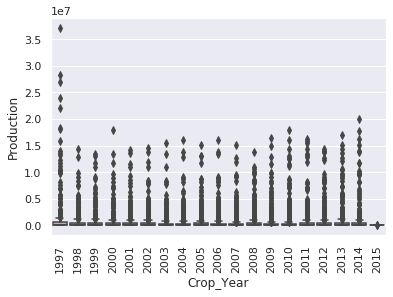

In [55]:
sns.boxplot(x = 'Crop_Year', y = 'Production', data = sugar);
plt.xticks(rotation = 90);

In [46]:
temp = sugar.groupby(['Crop_Year']).count()

In [47]:
temp.drop([2015], axis = 0, inplace = True)

In [48]:
temp

State_Name  District_Name  Season  Area  Production
Crop_Year                                                     
1997              330            330     330   330         330
1998              408            408     408   408         408
1999              444            444     444   444         444
2000              466            466     466   466         466
2001              461            461     461   461         461
2002              466            466     466   466         466
2003              461            461     461   461         461
2004              423            423     423   423         423
2005              469            469     469   469         469
2006              402            402     402   402         402
2007              460            460     460   460         460
2008              482            482     482   482         482
2009              458            458     458   458         458
2010              463            463     463   463         463
2011              405            405     405   405         405
2012              443            443     443   443         443
2013              411            411     411   411         411
2014              347            347     347   347         347

In [49]:
temp = sugar.groupby(['Crop_Year']).sum()
temp.drop([2015], axis = 0, inplace = True)

In [58]:
temp.reset_index(inplace = True)

In [59]:
temp

Crop_Year        Area    Production
0        1997  3482848.00  5.012291e+08
1        1998  3669497.00  2.598091e+08
2        1999  4126394.00  2.940924e+08
3        2000  4328291.00  2.961173e+08
4        2001  4403618.00  2.965126e+08
5        2002  4501972.00  2.870916e+08
6        2003  4001205.45  2.397903e+08
7        2004  3507183.23  2.299085e+08
8        2005  4217521.70  2.857609e+08
9        2006  3808456.89  2.687416e+08
10       2007  3857409.83  2.540599e+08
11       2008  5066968.00  3.411805e+08
12       2009  4090201.00  2.879257e+08
13       2010  4794320.90  3.365308e+08
14       2011  4696207.67  3.453955e+08
15       2012  4926975.00  3.354994e+08
16       2013  4721047.29  3.468605e+08
17       2014  4447143.79  3.285986e+08

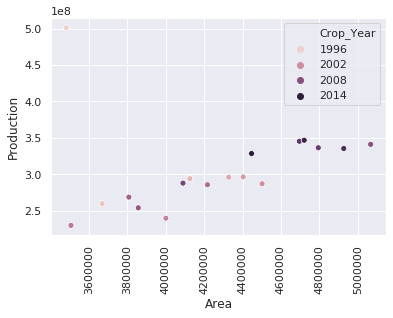

In [61]:
sns.scatterplot(x = 'Area', y = 'Production', data = temp, hue = 'Crop_Year');
plt.xticks(rotation = 90);

In [41]:
t = sugar.groupby(['Crop_Year','State_Name'])

In [42]:
t.count()

District_Name  Season  Area  Production
Crop_Year State_Name                                                
1997      Andhra Pradesh                13      13    13          13
          Arunachal Pradesh              9       9     9           9
          Assam                         23      23    23          23
          Bihar                         33      33    33          33
          Gujarat                       15      15    15          15
...                                    ...     ...   ...         ...
2014      Tripura                        8       8     8           8
          Uttar Pradesh                 75      75    75          75
          Uttarakhand                    5       5     5           5
          West Bengal                   16      16    16          16
2015      Odisha                        28      28    28          28

[457 rows x 4 columns]

In [63]:
s = t.sum()
s.reset_index(inplace = True)

In [65]:
s.sort_values(by = ['Crop_Year','Production'], ascending = [True, False], inplace = True)

In [68]:
top = s.groupby(['Crop_Year']).head()

In [70]:
tb = pd.pivot_table(top, index = 'State_Name', values = 'Production', columns = 'Crop_Year', aggfunc = np.sum)

In [76]:
tb.style.background_gradient(cmap ='Oranges', axis = 0)

"Tamil Nadu contributed to large sugarcane production in 1997"
"Uttar Pradesh has been the dominant contributor over years"

In [77]:
temp = tb.T

In [80]:
temp.reset_index(inplace = True)

In [81]:
temp

State_Name  Crop_Year  Andhra Pradesh       Bihar     Gujarat   Karnataka  \
0                1997      11028300.0         NaN  11832000.0  28999269.0   
1                1998      12687100.0         NaN  13565000.0         NaN   
2                1999      14671879.0         NaN         NaN  37397876.0   
3                2000      13558629.0         NaN         NaN  42923496.0   
4                2001      13383359.0         NaN         NaN  33016618.0   
5                2002             NaN         NaN  14069000.0  32485308.0   
6                2003             NaN         NaN  12669000.0  16015440.0   
7                2004      12701367.0         NaN  14558000.0         NaN   
8                2005             NaN         NaN  17786000.0  19647650.0   
9                2006      16805897.0         NaN  16554000.0  23641948.0   
10               2007      15159000.0         NaN  15190000.0  26028309.0   
11               2008             NaN         NaN  15512000.0  24266201.0   
12               2009             NaN         NaN  13304000.0  32285023.0   
13               2010             NaN         NaN  13763000.0  42276713.0   
14               2011      12844380.0         NaN         NaN  39470478.0   
15               2012             NaN  12741415.0         NaN  35510714.0   
16               2013             NaN  12881781.0         NaN  38042382.0   
17               2014      10002941.0  15498951.0         NaN  43838057.0   
18               2015             NaN         NaN         NaN         NaN   

State_Name  Maharashtra    Odisha   Tamil Nadu  Uttar Pradesh  
0                   NaN       NaN  307019000.0    114326591.0  
1            47151100.0       NaN   46672800.0    109489138.0  
2            53140400.0       NaN   35501817.0    108577182.0  
3            49568700.0       NaN   34062855.0    106067503.0  
4            45139800.0       NaN   32614900.0    117981573.0  
5            42617000.0       NaN   24165390.0    120948041.0  
6            25668400.0       NaN   19529277.0    117566725.0  
7            23913700.0       NaN   24457244.0    121755620.0  
8            38813700.0       NaN   35113269.0    125469871.0  
9                   NaN       NaN   48037332.0    133949379.0  
10                  NaN       NaN   38070965.0    124665288.0  
11          121297200.0       NaN   32798888.0    109047670.0  
12           64159300.0       NaN   29758209.0    117139919.0  
13           85691500.0       NaN   34251796.0    120544784.0  
14           89456100.0       NaN   38974842.0    128818743.0  
15           75335000.0       NaN   34014097.0    137904315.0  
16           83954000.0       NaN   32454135.0    142045762.0  
17           91538100.0       NaN          NaN    146576786.0  
18                  NaN  577157.2          NaN            NaN

In [82]:
temp = pd.melt(temp, id_vars = 'Crop_Year', value_vars = list(temp.columns).remove("Crop_Year"), value_name = 'Production',
               var_name = 'State')

In [126]:
temp

Crop_Year           State   Production
0         1997  Andhra Pradesh   11028300.0
1         1998  Andhra Pradesh   12687100.0
2         1999  Andhra Pradesh   14671879.0
3         2000  Andhra Pradesh   13558629.0
4         2001  Andhra Pradesh   13383359.0
..         ...             ...          ...
147       2011   Uttar Pradesh  128818743.0
148       2012   Uttar Pradesh  137904315.0
149       2013   Uttar Pradesh  142045762.0
150       2014   Uttar Pradesh  146576786.0
151       2015   Uttar Pradesh          NaN

[152 rows x 3 columns]

In [127]:
topstates = temp.State.unique()

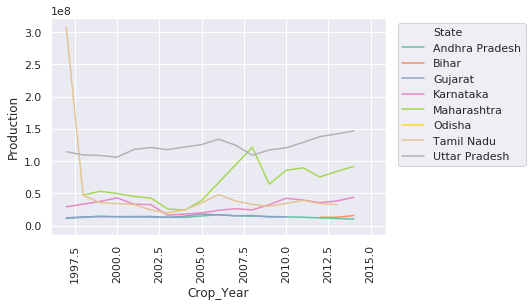

In [86]:
sns.lineplot(x = 'Crop_Year', y = 'Production', data = temp, hue = 'State', palette = "Set2");
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor = (1.02,1));

"Increased production in Maharashtra and Uttar Pradesh leads to rise in Sugarcane production over years"

### districts

In [87]:
sugar.sample(3)

State_Name District_Name  Crop_Year      Season     Area  \
183537     Tamil Nadu    PERAMBALUR       2003  Whole Year   8654.0   
68781         Haryana   KURUKSHETRA       2008  Whole Year  11332.0   
202997  Uttar Pradesh        BALLIA       2014      Kharif   4096.0   

        Production  
183537    826474.0  
68781     688000.0  
202997    213254.0

In [98]:
t = sugar.groupby(['Crop_Year','State_Name','District_Name'])

In [99]:
s = t.sum()
s.reset_index(inplace = True)

In [100]:
s.sort_values(by = ['Crop_Year','Production'], ascending = [True, False], inplace = True)

In [101]:
topdist = s.groupby('Crop_Year').head()

In [102]:
topdist

Crop_Year  State_Name   District_Name     Area  Production
234        1997  Tamil Nadu      VILLUPURAM  33175.0  37158000.0
210        1997  Tamil Nadu       CUDDALORE  23826.0  28322000.0
213        1997  Tamil Nadu           ERODE  24112.0  26930000.0
231        1997  Tamil Nadu  TIRUVANNAMALAI  27636.0  23914000.0
233        1997  Tamil Nadu         VELLORE  29072.0  22069000.0
...         ...         ...             ...      ...         ...
7784       2015      Odisha         KORAPUT   2261.0    159642.4
7776       2015      Odisha          GANJAM   1073.0     81130.6
7772       2015      Odisha         CUTTACK    861.0     61182.7
7786       2015      Odisha     NABARANGPUR    614.0     40578.6
7774       2015      Odisha       DHENKANAL    518.0     32845.9

[95 rows x 5 columns]

In [103]:
topdist.State_Name.unique()

array(['Tamil Nadu', 'Uttar Pradesh', 'Maharashtra', 'Gujarat',
       'Karnataka', 'Odisha'], dtype=object)

In [107]:
s.shape

(7794, 5)

In [122]:
tb = pd.pivot_table(s, index = ['State_Name','District_Name'], columns = 'Crop_Year', values = 'Production', aggfunc = np.sum)

In [131]:
t_ = tb.loc[topstates,:]

In [144]:
t_.style.highlight_null()

In [148]:
t_.drop([2015], axis = 1, inplace = True)

/usr/anaconda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [145]:
t_.style.background_gradient(cmap = 'Oranges', axis = 1)

/usr/anaconda/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


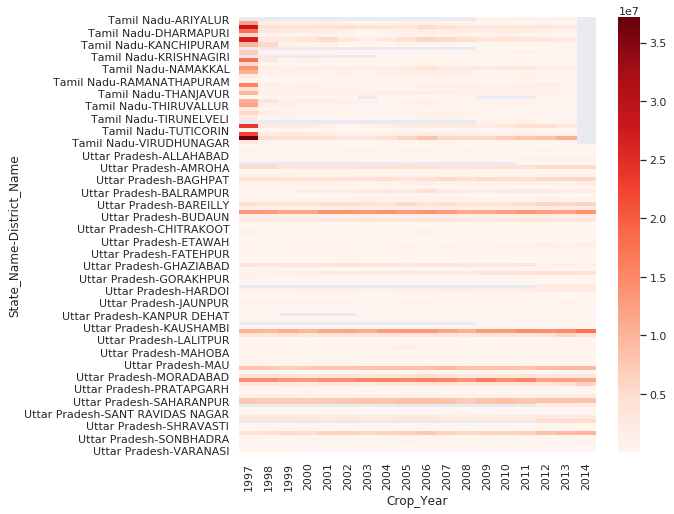

In [155]:
fig = plt.gcf()
fig.set_size_inches(8,8)
sns.heatmap(t_.loc[['Tamil Nadu','Uttar Pradesh'],:], cmap = 'Reds');

In [168]:
t = pd.pivot_table(topdist, index = ['State_Name','District_Name'], columns = 'Crop_Year', values = 'Production')

In [169]:
t.drop([2015], axis = 1, inplace = True)

In [172]:
t.dropna(how = 'all', inplace = True)

In [173]:
t.isna().sum(axis = 1)

State_Name     District_Name 
Gujarat        SURAT             13
Karnataka      BELGAUM            7
Maharashtra    AHMEDNAGAR        17
               KOLHAPUR           9
               PUNE              15
               SOLAPUR           13
Tamil Nadu     CUDDALORE         17
               ERODE             17
               TIRUVANNAMALAI    17
               VELLORE           17
               VILLUPURAM        17
Uttar Pradesh  BIJNOR             4
               KHERI              2
               MEERUT            13
               MUZAFFARNAGAR      3
               SAHARANPUR        17
dtype: int64

In [165]:
t_ = t.dropna(thresh = 6, inplace = False)

In [166]:
t.shape

(5, 18)

In [167]:
t.style.background_gradient(cmap = 'Oranges', axis = 0)

In [140]:
#top contributors of 1997
districts = ['CUDDALORE','ERODE','TIRUVANNAMALAI','VELLORE','VILLUPURAM']
td = s.loc[s.District_Name.isin(districts),:]

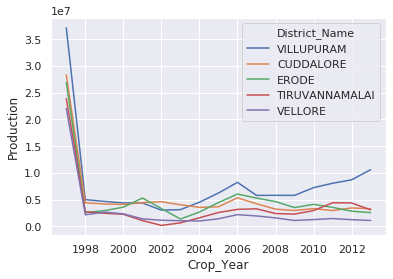

In [143]:
sns.lineplot(x = 'Crop_Year', y = 'Production', data = td, hue = 'District_Name');

### Wheat Production has increased: Fig- 1.1.3b

In [15]:
wheat.describe()

Crop_Year           Area    Production
count  7878.000000    7878.000000  7.878000e+03
mean   2005.457857   59750.348434  1.691833e+05
std       4.969598   69022.267334  2.514359e+05
min    1997.000000       1.000000  0.000000e+00
25%    2001.000000    2080.500000  2.564750e+03
50%    2005.000000   35682.000000  5.953550e+04
75%    2010.000000   92073.500000  2.414125e+05
max    2015.000000  422000.000000  1.969000e+06

In [20]:
t = wheat.groupby('Crop_Year').sum()
t['eff'] = t.Production/t.Area
t.style.background_gradient(cmap = 'Reds', axis = 0)

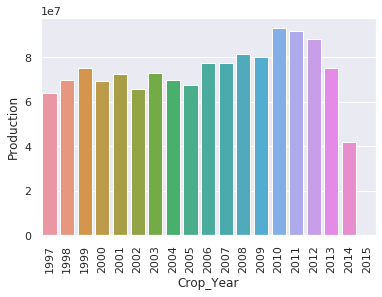

In [23]:
sns.barplot(x = t.index, y = 'Production', data = t);
plt.xticks(rotation = 90);

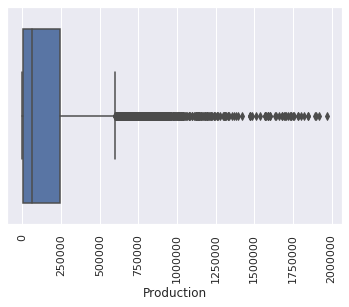

In [20]:
sns.boxplot(wheat.Production);
plt.xticks(rotation = 90);

In [26]:
per75 = np.quantile(wheat.Production, [0.75])

In [27]:
per75

array([241412.5])

In [28]:
len(wheat.State_Name.unique())

29

In [29]:
highprod = wheat[wheat.Production > per75[0]]

In [30]:
highprod.State_Name.unique()

array(['Bihar', 'Gujarat', 'Haryana', 'Madhya Pradesh', 'Maharashtra',
       'Punjab', 'Rajasthan', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [31]:
s = highprod.groupby(['Crop_Year','State_Name']).sum()

In [32]:
s.reset_index(inplace = True)

In [33]:
s.sort_values(by = ['Crop_Year','Production'], ascending = [True, False], inplace = True)

In [34]:
s.State_Name.unique()

array(['Uttar Pradesh', 'Punjab', 'Haryana', 'Madhya Pradesh',
       'Rajasthan', 'West Bengal', 'Bihar', 'Gujarat', 'Uttarakhand',
       'Maharashtra'], dtype=object)

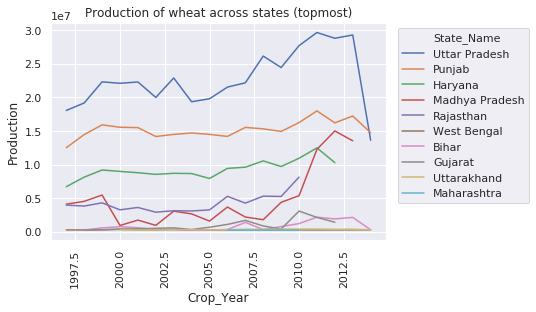

In [25]:
sns.lineplot(x = 'Crop_Year', y = 'Production', data = s, hue = 'State_Name');
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor = (1.02,1));
plt.title('Production of wheat across states (topmost)');

"wheat production in Uttar Pradesh has been high around 2008-2013"

In [27]:
t = s[(s.State_Name == "Uttar Pradesh")|(s.State_Name == "Madhya Pradesh")]

In [28]:
t = t.groupby('Crop_Year').sum()

In [29]:
t.reset_index(inplace = True)

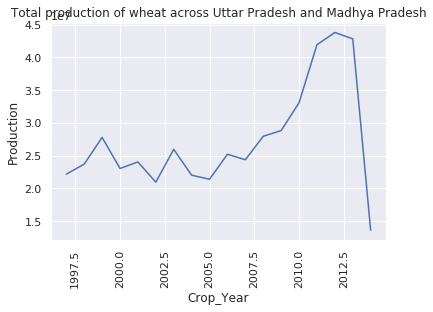

In [30]:
sns.lineplot(x = 'Crop_Year', y = 'Production', data = t);
plt.title('Total production of wheat across Uttar Pradesh and Madhya Pradesh');
plt.xticks(rotation = 90);

In [46]:
t.style.background_gradient(cmap = 'Reds', axis = 0)

In [42]:
s[s.State_Name == 'Rajasthan']

Crop_Year State_Name       Area  Production
3         1997  Rajasthan  1368500.0   3977200.0
11        1998  Rajasthan  1340618.0   3833237.0
18        1999  Rajasthan  1423170.0   4306940.0
25        2000  Rajasthan  1165180.0   3270117.0
33        2001  Rajasthan  1166635.0   3621467.0
41        2002  Rajasthan   960437.0   2919473.0
50        2003  Rajasthan  1032002.0   3134659.0
59        2004  Rajasthan   995212.0   3101015.0
68        2005  Rajasthan  1046552.0   3258221.0
78        2006  Rajasthan  1545977.0   5279132.0
87        2007  Rajasthan  1368326.0   4268819.0
96        2008  Rajasthan  1480804.0   5303032.0
105       2009  Rajasthan  1545069.0   5258517.0
115       2010  Rajasthan  2143146.0   8135067.0

In [43]:
wheat[wheat.State_Name == 'Rajasthan'].groupby('Crop_Year').sum()

Area  Production
Crop_Year                       
1997       2679800.0   6701000.0
1998       2766290.0   6879818.0
1999       2650187.0   6731932.0
2000       2309637.0   5547100.0
2001       2287498.0   6389030.0
2002       1800659.0   4878020.0
2003       2103059.0   5875862.0
2004       2010241.0   5706871.0
2005       2123910.0   5865293.0
2006       2564840.0   7755883.0
2007       2592188.0   7126040.0
2008       2294858.0   7287074.0
2009       2394213.0   7500851.0
2010       3036141.0  10424350.0

In [31]:
wheat_up = wheat[wheat.State_Name == 'Uttar Pradesh']

In [32]:
wheat_up.drop('State_Name', axis = 1, inplace = True)

/usr/anaconda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
tb = pd.pivot_table(wheat_up, index = 'District_Name', columns = 'Crop_Year', values = 'Production')

In [36]:
len(tb.index)

75

In [34]:
tb.style.highlight_null()

"Districts such as Amethi, Hapur, Kasganj, Sambhal, Shamli have started contributing to wheat production around 2010-2012"; 
"Perhaps one of the reasons for increased wheat production in Uttar Pradesh"

In [53]:
tb.fillna(0, inplace = True)

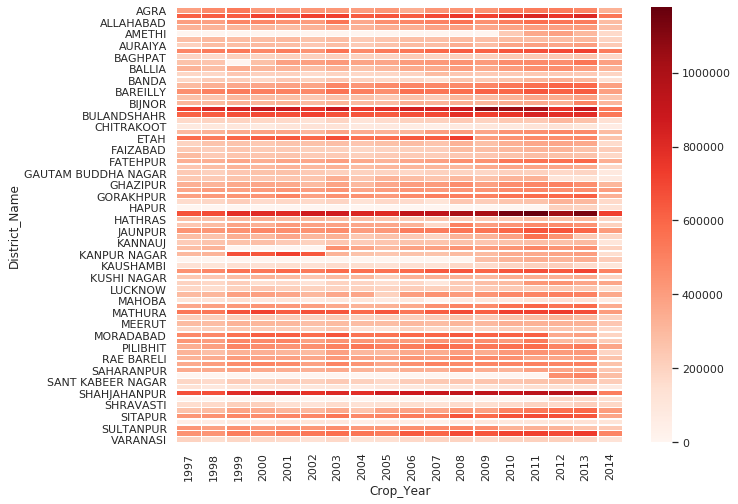

In [56]:
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(tb, cmap ='Reds', linewidths = 0.3);

In [37]:
tb.style.background_gradient(cmap = 'Oranges', axis = 1)

/usr/anaconda/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [38]:
tb['sum'] = tb.sum(axis = 1)

District_Name
AGRA               7926996.0
ALIGARH           12524504.0
ALLAHABAD          8415669.0
AMBEDKAR NAGAR     6217730.0
AMETHI             1455775.0
                     ...    
SITAPUR            9624871.0
SONBHADRA          1552884.0
SULTANPUR          7188924.0
UNNAO             10454451.0
VARANASI           3163120.0
Name: sum, Length: 75, dtype: float64

In [44]:
wheat_up.groupby('Crop_Year').sum().style.background_gradient(cmap = 'Reds',axis = 0)

### Cotton (lint) production declined steeply (2012-2014)

In [8]:
cotton = df[df.Crop == 'Cotton(lint)']

In [9]:
cotton.drop(['Crop'], axis = 1, inplace = True)

/usr/anaconda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
cotton.shape

(4518, 6)

In [11]:
cotton.State_Name.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'West Bengal'], dtype=object)

In [12]:
cotton.nunique()

State_Name         25
District_Name     380
Crop_Year          18
Season              6
Area             2715
Production       2759
dtype: int64

In [13]:
cotton.isna().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Area               0
Production       136
dtype: int64

In [14]:
cotton.dropna(axis = 0, inplace = True)

/usr/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
cotton.nunique()

State_Name         25
District_Name     375
Crop_Year          18
Season              6
Area             2704
Production       2759
dtype: int64

In [16]:
cotton.sort_values(by = ['Crop_Year','Production'], ascending = [True, False])

State_Name  District_Name  Crop_Year      Season      Area  \
64407          Gujarat  SURENDRANAGAR       1997  Whole Year  398200.0   
63259          Gujarat         RAJKOT       1997  Whole Year  143800.0   
58948          Gujarat      BHAVNAGAR       1997  Whole Year  178500.0   
2548    Andhra Pradesh         GUNTUR       1997      Kharif  162300.0   
113634  Madhya Pradesh       KHARGONE       1997      Kharif  212300.0   
...                ...            ...        ...         ...       ...   
20499            Assam         KAMRUP       2014      Kharif       2.0   
24905            Assam        NALBARI       2014      Kharif       1.0   
26631            Assam       TINSUKIA       2014      Kharif       1.0   
46416     Chhattisgarh      BALRAMPUR       2014  Whole Year       6.0   
201989   Uttar Pradesh        BAGHPAT       2014      Kharif       4.0   

        Production  
64407     700000.0  
63259     528800.0  
58948     502600.0  
2548      432500.0  
113634    408000.0  
...            ...  
20499          1.0  
24905          1.0  
26631          1.0  
46416          1.0  
201989         1.0  

[4382 rows x 6 columns]

In [17]:
t = cotton.groupby('Crop_Year').sum()
t['eff'] = t.Production/t.Area

In [18]:
t.style.background_gradient(cmap = 'Greens', axis = 0)

#### Crop_Year, State_Name

In [62]:
s = cotton.groupby(['Crop_Year','State_Name']).sum()

In [64]:
s.reset_index(inplace = True)

In [65]:
s.sort_values(by = ['Crop_Year','Production'], ascending = [True, False], inplace = True)

In [68]:
topstates = s.groupby('Crop_Year').head()

In [70]:
topstates['eff'] = topstates.Production/topstates.Area

/usr/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
eff = topstates.sort_values(by = ['Crop_Year','eff'], ascending = [True, False])

In [82]:
eff

Crop_Year      State_Name       Area  Production        eff
6         1997     Maharashtra    31292.0   1753100.0  56.023904
3         1997         Gujarat  1518900.0   3180200.0   2.093752
4         1997         Haryana   631000.0   1107000.0   1.754358
9         1997       Rajasthan   644000.0    867050.0   1.346351
8         1997          Punjab   724000.0    937000.0   1.294199
..         ...             ...        ...         ...        ...
334       2014  Andhra Pradesh   821077.0   2751284.0   3.350823
342       2014          Punjab   420000.0   1342000.0   3.195238
337       2014       Karnataka   875934.0   2313338.0   2.640996
343       2014       Telangana  1662925.0   3583327.0   2.154834
338       2014     Maharashtra  4189900.0   3577100.0   0.853744

[90 rows x 5 columns]

Maharashtra has exceptionally high efficiency of production in 1997

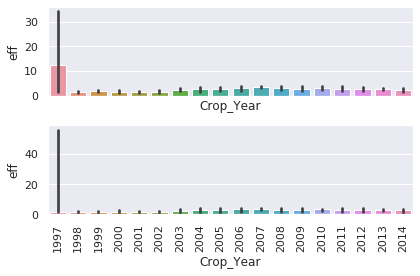

In [84]:
fig, ax = plt.subplots(2, sharex = True)
sns.barplot(x = 'Crop_Year', y = 'eff', data = eff, estimator = np.mean, ax = ax[0]);
sns.barplot(x = 'Crop_Year', y = 'eff', data = eff, estimator = np.median, ax = ax[1]);
plt.xticks(rotation = 90);
plt.tight_layout()

In [87]:
topstates.style.background_gradient(cmap = 'Oranges', axis = 0)

In [88]:
tb = pd.pivot_table(topstates, index = ['State_Name'], values = 'Production', columns = 'Crop_Year')

In [92]:
tb.dropna(axis = 0, thresh = 4, inplace = True)

In [93]:
tb.style.background_gradient(cmap = 'Reds', axis = 0)

/usr/anaconda/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [97]:
t = tb.T
t

State_Name  Andhra Pradesh     Gujarat    Haryana  Maharashtra     Punjab  \
Crop_Year                                                                   
1997                   NaN   3180200.0  1107000.0    1753100.0   937000.0   
1998                   NaN   3903000.0   874000.0    2618900.0        NaN   
1999                   NaN   2085500.0  1304000.0    3099300.0   950000.0   
2000                   NaN   1161400.0  1016700.0    1802600.0  1199000.0   
2001              727872.0   1703200.0        NaN    2689600.0  1307000.0   
2002                   NaN   1684500.0  1038000.0    2596100.0  1083000.0   
2003                   NaN   4026900.0  1407000.0    3080100.0  1478000.0   
2004                   NaN   5443500.0  2075000.0    2938500.0  2087000.0   
2005                   NaN   6871600.0  1502000.0    3160100.0  2395000.0   
2006                   NaN   7876400.0  1805000.0    4617500.0  2678000.0   
2007             1009000.0   8275700.0  1882000.0          NaN  2355000.0   
2008                   NaN   7013800.0  1862000.0    4752300.0  2285000.0   
2009                   NaN   7401000.0  1918000.0    5111200.0  2006000.0   
2010                   NaN   9825300.0  1747000.0    7472500.0  1822000.0   
2011                   NaN  10374600.0  2621000.0    6820100.0  1621000.0   
2012             1543271.0   4950900.0  2378000.0    6793000.0  1627000.0   
2013             2187964.0         NaN        NaN    8834200.0  1495000.0   
2014             2751284.0         NaN        NaN    3577100.0  1342000.0   

State_Name  Telangana  
Crop_Year              
1997              NaN  
1998        1081300.0  
1999        1032462.0  
2000        1014786.0  
2001        1148826.0  
2002         696484.0  
2003        1075882.0  
2004        1171636.0  
2005        1413604.0  
2006        1492901.0  
2007        2480000.0  
2008        2540867.0  
2009        2337191.0  
2010        3034872.0  
2011        2293591.0  
2012              NaN  
2013        4265305.0  
2014        3583327.0

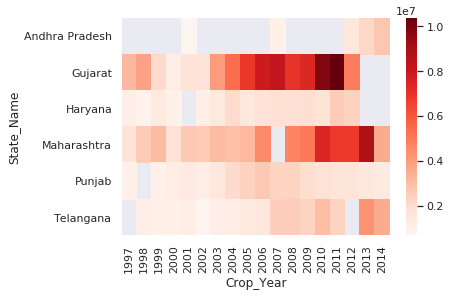

In [98]:
sns.heatmap(tb, cmap = 'Reds');

Production declined in Gujarat around 2012; one of the major contributors of Cotton

In [101]:
t['tot'] = t.sum(axis = 1)

In [113]:
st = t.columns

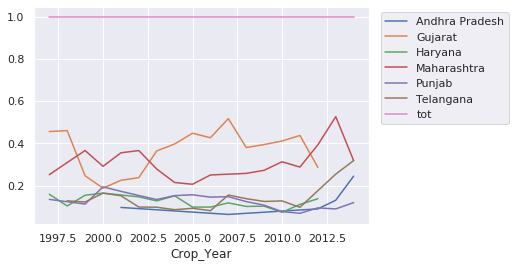

In [111]:
for state in st:
    temp = t[state]/t.tot
    sns.lineplot(x = temp.index, y = temp.values);
plt.legend(st, bbox_to_anchor = (1.02,1));

Contribution of Gujarat declined around 1998-2001
Gujarat contributed more than 40%

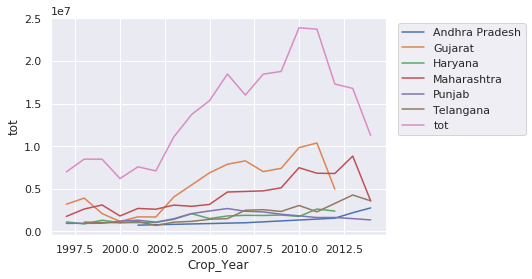

In [114]:
for state in st:
    sns.lineplot(x = t.index, y = state, data = t);
plt.legend(st, bbox_to_anchor=(1.02,1));

In [19]:
guj = cotton[cotton.State_Name == 'Gujarat']

In [20]:
guj.drop(['State_Name'], axis = 1, inplace = True)

/usr/anaconda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [124]:
guj.Season.unique()

array(['Whole Year', 'Kharif'], dtype=object)

In [125]:
guj.District_Name.unique()

array(['AHMADABAD', 'AMRELI', 'ANAND', 'BANAS KANTHA', 'BHARUCH',
       'BHAVNAGAR', 'DOHAD', 'GANDHINAGAR', 'JAMNAGAR', 'JUNAGADH',
       'KACHCHH', 'KHEDA', 'MAHESANA', 'NARMADA', 'PANCH MAHALS', 'PATAN',
       'PORBANDAR', 'RAJKOT', 'SABAR KANTHA', 'SURAT', 'SURENDRANAGAR',
       'TAPI', 'VADODARA'], dtype=object)

In [21]:
tb = pd.pivot_table(guj, index = ['District_Name','Season'], columns = 'Crop_Year', values = 'Production',aggfunc = np.sum)

In [22]:
tb.xs('Whole Year',level = 1)

Crop_Year          1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  \
District_Name                                                                   
AHMADABAD      181500.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
AMRELI         228200.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
BANAS KANTHA    33300.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
BHARUCH        135500.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
BHAVNAGAR      502600.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
GANDHINAGAR     10300.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
JAMNAGAR       115700.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
JUNAGADH       105300.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
KACHCHH         82200.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
KHEDA           27000.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
MAHESANA       198400.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
PANCH MAHALS    15900.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
RAJKOT         528800.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
SABAR KANTHA    56400.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
SURAT           13000.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
SURENDRANAGAR  700000.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
VADODARA       246100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Crop_Year      2007  2008  2009  2010  2011  2012  
District_Name                                      
AHMADABAD       NaN   NaN   NaN   NaN   NaN   NaN  
AMRELI          NaN   NaN   NaN   NaN   NaN   NaN  
BANAS KANTHA    NaN   NaN   NaN   NaN   NaN   NaN  
BHARUCH         NaN   NaN   NaN   NaN   NaN   NaN  
BHAVNAGAR       NaN   NaN   NaN   NaN   NaN   NaN  
GANDHINAGAR     NaN   NaN   NaN   NaN   NaN   NaN  
JAMNAGAR        NaN   NaN   NaN   NaN   NaN   NaN  
JUNAGADH        NaN   NaN   NaN   NaN   NaN   NaN  
KACHCHH         NaN   NaN   NaN   NaN   NaN   NaN  
KHEDA           NaN   NaN   NaN   NaN   NaN   NaN  
MAHESANA        NaN   NaN   NaN   NaN   NaN   NaN  
PANCH MAHALS    NaN   NaN   NaN   NaN   NaN   NaN  
RAJKOT          NaN   NaN   NaN   NaN   NaN   NaN  
SABAR KANTHA    NaN   NaN   NaN   NaN   NaN   NaN  
SURAT           NaN   NaN   NaN   NaN   NaN   NaN  
SURENDRANAGAR   NaN   NaN   NaN   NaN   NaN   NaN  
VADODARA        NaN   NaN   NaN   NaN   NaN   NaN

In [23]:
tb.drop('Whole Year', level ='Season', inplace = True)

In [24]:
tb.drop([1997], axis = 1, inplace = True)

In [25]:
tb.reset_index(inplace = True)

In [26]:
tb.drop(['Season'], axis = 1, inplace = True)

In [27]:
tb.set_index('District_Name', inplace = True)

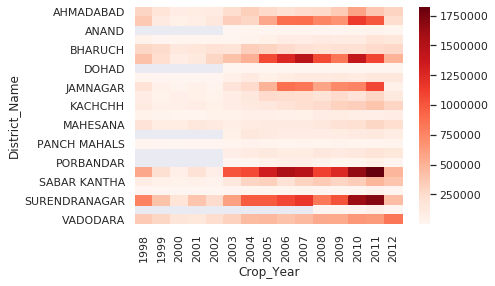

In [148]:
sns.heatmap(tb, cmap = 'Reds');

In [28]:
maha = cotton[cotton.State_Name == "Maharashtra"]

In [29]:
maha.shape

(465, 6)

In [30]:
maha.drop(['State_Name'], axis = 1, inplace = True)

/usr/anaconda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
maha.style

In [32]:
maha.District_Name.unique()

array(['AHMEDNAGAR', 'AKOLA', 'AMRAVATI', 'AURANGABAD', 'BEED',
       'BULDHANA', 'CHANDRAPUR', 'DHULE', 'GADCHIROLI', 'HINGOLI',
       'JALGAON', 'JALNA', 'KOLHAPUR', 'LATUR', 'NAGPUR', 'NANDED',
       'NANDURBAR', 'NASHIK', 'OSMANABAD', 'PARBHANI', 'PUNE', 'SANGLI',
       'SATARA', 'SOLAPUR', 'WARDHA', 'WASHIM', 'YAVATMAL'], dtype=object)

In [33]:
maha.Season.unique()

array(['Whole Year', 'Kharif'], dtype=object)

In [35]:
tb = pd.pivot_table(maha, index = ['District_Name','Season'], columns = 'Crop_Year', values = 'Production', aggfunc = np.sum)

In [36]:
tb.style

In [37]:
tb.drop('Whole Year', level = 'Season', inplace = True)

In [40]:
tb.drop([1997,2004], axis = 1, inplace = True)

In [42]:
tb.reset_index(inplace = True)

In [43]:
tb.drop(['Season'], axis = 1, inplace = True)

In [45]:
tb.set_index('District_Name', inplace = True)

In [46]:
tb.style.background_gradient(cmap = 'Reds', axis = 0)

/usr/anaconda/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


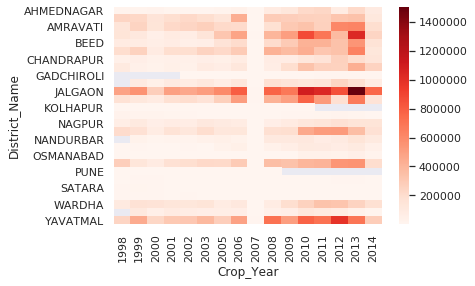

In [47]:
sns.heatmap(tb, cmap = 'Reds', );

"Contribution of various districts of Maharashtra started declining after 2013"